In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# LOAD TENDERS
Tenders = pd.read_excel("C:/Users/Mitch/git/UWACapstoneG2/data/UpdatedAgainTenders.xlsx")

# LOAD EMBEDDINGS
a = np.load("C:/Users/Mitch/git/UWACapstoneG2/contributions/andre_italiano_22506333/bert model development/document_embeddings.npz")
loaded_array_list = [a[f] for f in a.files]

# MAPPINGS 
Mappings = ['02022021DLGSCPTT.', '20221AGWA.', 'CAHS20205157.', 'CAHS20218111.', 'CAHS20218444.', 'CAHS20218822.', 'CAHS20218923.', 'CC072022.', 'CC102022.', 'CC112022.', 'CC122022.', 'CCC2521.', 'COP2020001.', 'CoP2021003.', 'CRTF200001038.', 'CTF2021008.', 'DBCA411ST2772022.', 'DBCA419ST1472021.', 'DBCA420ST1902022.', 'DBCA422ST332021.', 'DBCA422ST342021.', 'DBCA4241292021.', 'DBCA538ST292021.', 'DBCA752GT1662022.', 'DBCA752GT1922022.', 'DBCA760SQ2202022.', 'DBCARIAT0423.', 'DBCARIAT1422.', 'DBCARIAT4021.', 'DBCARIAT5121.', 'DBCARIAT5821.', 'DBCAZPA1407222.', 'DBCAZPA1424523.', 'DFES189119.', 'DFES197120.', 'DFES197720.', 'DFES199221.', 'DFES199721.', 'DFES199821.', 'DFES200821.', 'DFES202621.', 'DFES202721.', 'DFES203221.', 'DFES205621.', 'DFES206321.', 'DFES207721.', 'DFES208721.', 'DFES209921.', 'DFES210422.', 'DFES216222.', 'DFES218322.', 'DFES220422.', 'DFES220923.', 'DIOT201505637A.', 'DMIRS20180.', 'DMIRS21775.', 'DMIRS21805.', 'DMIRS21836.', 'DMIRS21838.', 'DMIRS21863.', 'DMIRS22029.', 'DMIRS22188.', 'DMIRS22207.', 'DMIRS22398.', 'DMIRS23011.', 'DMIRS23096.', 'DOC202017555.', 'DOC202025784.', 'DoC202111277.', 'DOC202118806.', 'DOC202121328.', 'DOC202125086.', 'DOC202127143.', 'DOC202129223.', 'DoC20214686.', 'DOC20214689.', 'DOC20214856.', 'DOC20215804.', 'DOC202217167.', 'DOC202217226.', 'DOC202217284.', 'DOC202217288.', 'DOC20222261.', 'DOC202223435.', 'DOC202227432.', 'DOC202231491.', 'DOC202246435.', 'DOC20232450.', 'DOC9631322.', 'DoH20194700.', 'DoH20205122.', 'DoH20205339.', 'DoH20216858.', 'DoH20217885.', 'DOH202210641.', 'DOH2022CCIRWA.', 'DOH20239722.', 'DoJ202000469.', 'DOJ202021011.', 'DoJ202024214.', 'DoJ202026682.', 'DOJ202111378.', 'DoJ202119774.', 'DOJ202132458.', 'DOJ202149078.', 'DoJ202211131.', 'DOJ202224865.', 'DOJ202225404.', 'DOJ202243835.', 'DOT300122.', 'DOT400123.', 'DOT400223.', 'DOT403322.', 'DOT404017reoi2.', 'DOT404919.', 'DOT405122.', 'DOT405923.', 'DOT408321.', 'DOT409822.', 'DOT411421.', 'DOT412622.', 'DOT412921.', 'DOT414022.', 'DOT414421.', 'DOT415220.', 'DOT415622.', 'DOT419622.', 'DOT423022.', 'DPC1825.', 'DPC1868.', 'DPC1921.', 'DPC1966.', 'DPC2001.', 'DPC2006.', 'DPIRD2021037.', 'DPIRD2021092.', 'DPIRD2021114.', 'DPIRD2022010.', 'DPIRD2022024.', 'DPIRD2022061.', 'DPIRD2022070.', 'DPIRD2022087.', 'DPIRD2022112.', 'DPIRD2023004.', 'DPIRD2023008.', 'DPIRD2023059.', 'DPIRD2023075.', 'DPIRD2023106A.', 'DPIRD2023130.', 'DPLH100123.', 'DPLH100722.', 'DPLH101021A.', 'DPLH101022.', 'DPLH101222.', 'DPLH101921.', 'DPLH102021.', 'DPLH30112022.', 'DWER100522.', 'DWER100623.', 'DWER100722.', 'DWER101321.', 'DWER101323.', 'DWER101422.', 'DWER101721.', 'DWER101722.', 'DWER101821.', 'DWER102021.', 'DWER102322.', 'DWER103221.', 'DWER103321.', 'DWER103722.', 'DWER104220.', 'DWER104320.', 'DWER104321.', 'DWER104521.', 'DWER104620.', 'DWER104722.', 'DWER200319.', 'ED18290D.', 'ED18290E.', 'ED19287.', 'ED19315.', 'ED19412.', 'ED200049.', 'ED200100.', 'ED200140.', 'ED200197.', 'ED200281.', 'ED200358.', 'ED200368.', 'ED200390.', 'ED200420.', 'ED210000.', 'ED210012.', 'ED210016.', 'ED210017.', 'ED210018.', 'ED210020.', 'ED210029.', 'ED210048.', 'ED210053.', 'ED210057.', 'ED210089.', 'ED210094.', 'ED210114.', 'ED210174.', 'ED210177.', 'ED210178.', 'ED210182.', 'ED210204.', 'ED210225.', 'ED210238.', 'ED210240.', 'ED210244.', 'ED210248.', 'ED210266.', 'ED210274.', 'ED210280.', 'ED210312.', 'ED210328.', 'ED220067.', 'ED220176.', 'ED220177.', 'ED220179.', 'ED220180.', 'ED220181.', 'ED220328.', 'ED220339.', 'ED220346.', 'ED220375.', 'ED220391.', 'ED220403.', 'ED220445.', 'ED220471.', 'ED220497.', 'ED220499.', 'ED220509.', 'ED220519.', 'ED220546.', 'ED220558.', 'ED220563.', 'ED220584.', 'ED220585.', 'ED220587.', 'ED220610.', 'ED220680.', 'ED220701.', 'ED220744.', 'ED220776.', 'ED229594.', 'ED230060.', 'ED230139.', 'EMHS20205133.', 'EMHS20206857.', 'EMHS20216256.', 'EMHS20217992.', 'EMHS20218113.', 'EMHS20218308.', 'EMHS20218384.', 'EMHS202210005.', 'EMHS202210008.', 'EMHS20229051.', 'EMHS20229919.', 'EPWA2122005.', 'ERA2019146.', 'ERA2021162.', 'F2000569.', 'F2000680.', 'F21000117.', 'F2100327.', 'F2100497.', 'F2100633.', 'F2200251.', 'F2200625.', 'FIN21061.', 'FIN22040.', 'FIN873DLGSCAG.', 'FINW0061823.', 'FINW0062323.', 'FINW0115223.', 'FINW0143523.', 'FINW0144423.', 'FINW0147123.', 'FINW0159522.', 'FINW0162622.', 'FINW0162922.', 'FINW0163922.', 'FINW0590522.', 'FPCRFT52021.', 'GESB20014.', 'GESB22002.', 'HSS100516.', 'HSS106520.', 'HSS20216271.', 'HSS20218451.', 'HSS20218454.', 'HSS605220.', 'HSSTHP2023.', 'JTSI2021015.', 'JTSI2021020.', 'JTSI2122031.', 'JTSI2122064.', 'JTSI2223025.', 'LAWADTP2205CGLPM2.', 'LHAAC202201.', 'LW19032.', 'LW19038.', 'LW19043.', 'LW20019.', 'LW20031.', 'LW20043.', 'LW2104.', 'LW2135.', 'LW2138.', 'MHC2021069A.', 'MHC2022081.', 'MHC739.', 'MHC887A.', 'MRIWA20221.', 'MRWA010716B.', 'MRWA010716C.', 'MRWA010716D.', 'MRWA010716E.', 'MRWA017922.', 'MRWA019618.', 'NMHS20194533.', 'NMHS20205254.', 'NMHS20205597ROPlant.', 'NMHS20206544.', 'NMHS20206678.', 'NMHS20216964.', 'NMHS20217128.', 'NMHS20217609.', 'NMHS20217933A.', 'NMHS20218279.', 'NMHS202210432.', 'NMHS202210491.', 'NMHS202210636.', 'NMHS20229061.', 'NMTAFEP2020021.', 'NMTAFEP2022051.', 'NRTAFE022020.', 'OPH2020099.', 'P22104B.', 'PSC1006CM.', 'PSC1013CM.', 'PSD20210903.', 'PTA230020.', 'PTO202126373.', 'PWST20205943.', 'PWST20206125.', 'PWST20217983.', 'PWST20218703.', 'RFQ201904.', 'RFQBPB202108.', 'RFT22020.', 'RFT292022PT.', 'SLWA22344CS014.', 'SMT032019.', 'SMT032020.', 'SMT032022.', 'SMT042021.', 'SMT052019.', 'SMT132021.', 'SMT172022.', 'SPA2021043M.', 'TREAS20010.', 'TWA1920081.', 'TWA2021331.', 'TWA2122022.', 'TWDQ02922021.', 'TWDQ02962021.', 'TWDT02392019A.', 'TWDT02742020.', 'TWDT02822020.', 'TWDT03192021.', 'TWDT03362022.', 'TWDT03382022.', 'TWDT03442022.', 'TWDT03452022.', 'TWDV02432019.', 'TWDV03162021.', 'WACHS20194426.', 'WACHS20205370.', 'WACHS20206133.', 'WACHS20206505.', 'WACHS20217278.', 'WACHS20217489.', 'WACHS20218409.', 'WACHS20218516.', 'WACHS20218753.', 'WACHS202210536.', 'WACHS20228435.', 'WACHS20228813.', 'WACHS20229686.', 'WACHS202310755.', 'WACHS20239902.', 'WACHSMW20218324.', 'WACHSMW20229856.', 'WAPOL00119.', 'WAPOL00623.', 'WAPOL01722.', 'WAPOL02221.', 'WAPOL02522.', 'WAPOL02622.', 'WAPOL03722.', 'WAPOL04723.', 'WAPOL05820.', 'WAPOL06720.', 'WAPOL08220.', 'WAPOL08820.', 'WAPOL11721.', 'WAPOL12221.', 'WAPOL13118A.', 'WAPOL13521.', 'WAPOL14621.', 'WAPOL14920.', 'WAPOL15320.', 'WAPOL15720.', 'WAPOL16020.', 'WAPOL16520.', 'WAPOL18920.', 'WCT0122.', 'WAPOL0']
Mappings = [item.rstrip('.') for item in Mappings]

In [2]:
# PRINCIPAL COMPONENT ANALYSIS
#scaler = StandardScaler()
#scaled = scaler.fit_transform(loaded_array_list)
#pca = PCA(n_components=2)
#scaled_pca = pca.fit_transform(scaled)

In [3]:
# GRID SEARCH
param_grid = {'n_clusters': [10, 12, 14, 16, 18, 20], 'linkage': ['complete', 'average', 'single']}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

clustering = AgglomerativeClustering()
grid_search = GridSearchCV(clustering, param_grid=param_grid, scoring=silhouette_scorer, cv=5, verbose=1)
grid_search.fit(loaded_array_list)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'linkage': 'average', 'n_clusters': 10}


In [4]:
results = grid_search.cv_results_
mean_silhouette_scores = results['mean_test_score']
params_used = results['params']

for score, params in zip(mean_silhouette_scores, params_used):
    print("Silhouette Score:", score)
    print("Parameters:", params)
    print("<---------------------------------------------------->")

Silhouette Score: 0.1453773483633995
Parameters: {'linkage': 'complete', 'n_clusters': 10}
<---------------------------------------------------->
Silhouette Score: 0.12936215698719025
Parameters: {'linkage': 'complete', 'n_clusters': 12}
<---------------------------------------------------->
Silhouette Score: 0.11637718677520752
Parameters: {'linkage': 'complete', 'n_clusters': 14}
<---------------------------------------------------->
Silhouette Score: 0.11931603401899338
Parameters: {'linkage': 'complete', 'n_clusters': 16}
<---------------------------------------------------->
Silhouette Score: 0.11721078157424927
Parameters: {'linkage': 'complete', 'n_clusters': 18}
<---------------------------------------------------->
Silhouette Score: 0.1117839902639389
Parameters: {'linkage': 'complete', 'n_clusters': 20}
<---------------------------------------------------->
Silhouette Score: 0.196670201420784
Parameters: {'linkage': 'average', 'n_clusters': 10}
<------------------------------

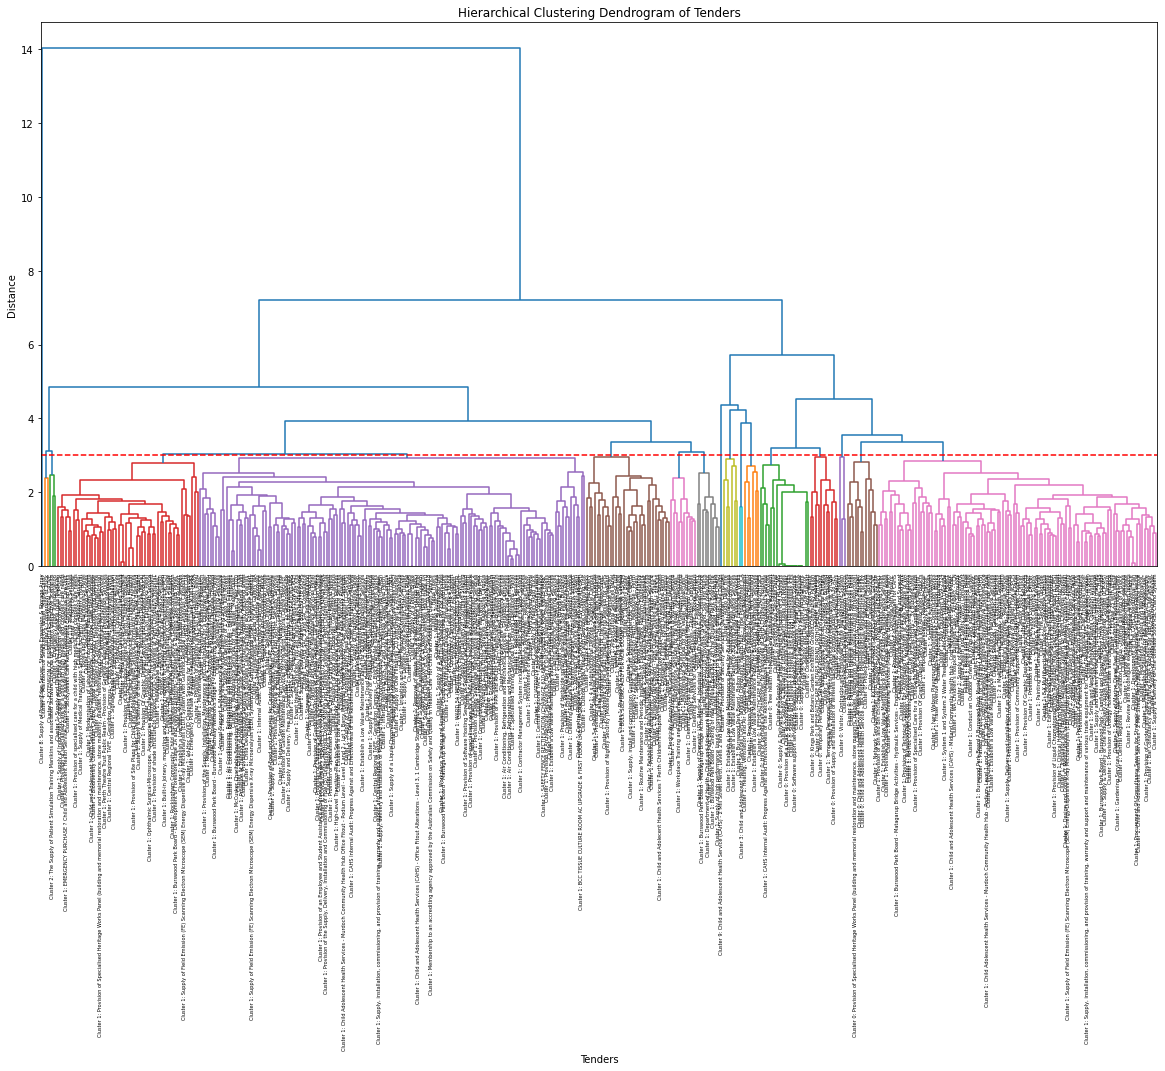

In [6]:
# AGGLOMERATIVE CLUSTERING
clusters = best_estimator.fit_predict(loaded_array_list)
thres = 3

# CLUSTER MAPPINGS
TenderClusters = {}
for ReferenceNumber, cluster in zip(Mappings, clusters):
    TenderClusters[ReferenceNumber] = cluster
Tenders['Cluster'] = Tenders['Reference Number'].map(TenderClusters)
labels = [f'Cluster {cluster}: {Tenders.iloc[i]["Contract Title"]}' for i, cluster in enumerate(clusters)]

linkage_matrix = linkage(loaded_array_list, method='complete', metric='euclidean')
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, labels=labels, color_threshold=thres)
plt.xlabel('Tenders')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram of Tenders')
plt.axhline(y=thres, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Tenders_sorted = Tenders.sort_values(by=['Cluster', 'Contract Title'])
Tenders_sorted = Tenders_sorted[["Contract Title", "Cluster"]].dropna(subset=["Cluster"]).drop_duplicates()

for index, row in Tenders_sorted.iterrows():
    contract_title = row['Contract Title']
    cluster = row['Cluster']
    print(f'Contract Title: {contract_title}, Cluster: {cluster}')